## Trees

Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
np.unique(titanic["survived"], return_counts=True)

(array([0, 1]), array([549, 342]))

In [4]:
np.unique(titanic["class"], return_counts=True)

(array(['First', 'Second', 'Third'], dtype=object), array([216, 184, 491]))

In [5]:
np.unique(titanic["sex"], return_counts=True)

(array(['female', 'male'], dtype=object), array([314, 577]))

In [6]:
gender = pd.get_dummies(titanic['sex'], dtype = 'int64')
gender

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [7]:
clas = pd.get_dummies(titanic['class'], dtype = 'int64')
clas

,First,Second,Third
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [8]:
y = titanic["survived"]

In [9]:
X = pd.concat([clas.First, clas.Second, gender.female], axis=1)
X

,First,Second,female
0,0,0,0
1,1,0,1
2,0,0,1
3,1,0,1
4,0,0,0
...,...,...,...
886,0,1,0
887,1,0,1
888,0,0,1
889,1,0,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train.shape

(623, 3)

In [13]:
y_train.shape

(623,)

In [14]:
X_test.shape

(268, 3)

In [15]:
y_test.shape

(268,)

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [17]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5555555555555556, 0.875, 'x[2] <= 0.5\ngini = 0.467\nsamples = 623\nvalue = [392, 231]'),
 Text(0.3333333333333333, 0.625, 'x[0] <= 0.5\ngini = 0.302\nsamples = 410\nvalue = [334, 76]'),
 Text(0.4444444444444444, 0.75, 'True  '),
 Text(0.2222222222222222, 0.375, 'x[1] <= 0.5\ngini = 0.26\nsamples = 332\nvalue = [281, 51]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.247\nsamples = 249\nvalue = [213, 36]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.296\nsamples = 83\nvalue = [68, 15]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.436\nsamples = 78\nvalue = [53.0, 25.0]'),
 Text(0.7777777777777778, 0.625, 'x[0] <= 0.5\ngini = 0.396\nsamples = 213\nvalue = [58, 155]'),
 Text(0.6666666666666667, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'x[1] <= 0.5\ngini = 0.462\nsamples = 152\nvalue = [55, 97]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.499\nsamples = 103\nvalue = [54, 49]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.04\nsamples = 49\nvalue = [1.0, 48.0]'),
 Text(0.88

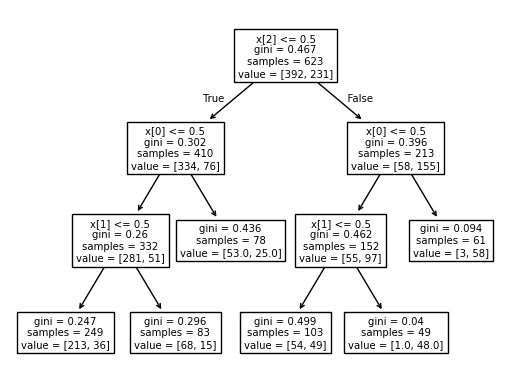

In [18]:
plot_tree(dt_model) # can read about Gini here: en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity

In [19]:
rose = np.array([[1, 0, 1]]) # must be a matrix format
jack = np.array([[0, 0, 0]])

In [20]:
dt_model.predict(rose)
dt_model.predict(jack)

/opt/anaconda3/envs/my_ai_py/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/my_ai_py/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [21]:
dt_model.predict_proba(rose)

/opt/anaconda3/envs/my_ai_py/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.04918033, 0.95081967]])

In [22]:
dt_model.predict_proba(jack)

/opt/anaconda3/envs/my_ai_py/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.85542169, 0.14457831]])

In [23]:
dt_yhat = dt_model.predict(X_test) # decision trees are prone to overfitting training data

In [24]:
dt_yhat[:6]

array([0, 0, 0, 1, 0, 1])

In [25]:
y_test[:6]

709    1
439    0
840    0
720    1
39     1
290    1
Name: survived, dtype: int64

In [26]:
from sklearn.metrics import accuracy_score, roc_auc_score
accuracy_score(dt_yhat, y_test)

0.7723880597014925

In [27]:
roc_auc_score(dt_yhat, y_test)

np.float64(0.8237179487179488)

**Exercises**:

1. Create more features ([here are some ideas for creating them](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8)) with an eye to improving model fit on the test data.

2. Re-train the decision tree on the training data and evaluate its accuracy and ROC AUC on the test data. How does the tree compare with an ordinary-least-squares regression model (from [*Intro to Stats*](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/6-statistics.ipynb)) trained on the same data?

## Random Forests

In [28]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


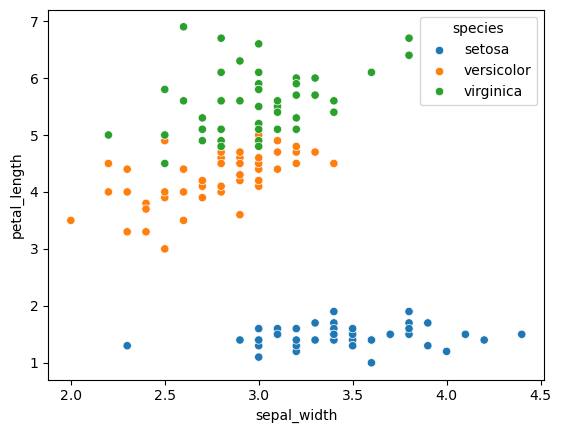

In [29]:
_ = sns.scatterplot(x='sepal_width', y='petal_length', hue='species', data=iris)

In [30]:
X = iris[['sepal_width', 'petal_length']]
y = iris['species']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
iris_dt = DecisionTreeClassifier().fit(X_train, y_train)

In [33]:
iris_dt_yhat = iris_dt.predict(X_test)
accuracy_score(iris_dt_yhat, y_test) # ROC AUC is for binary classification

0.9

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
rf_yhat = rf_model.predict(X_test)
accuracy_score(rf_yhat, y_test)

0.96